In [1]:
# TODO
# Load dataset with conditioning
# Load model
# Generate using the conditioning

In [2]:
import os
import sys
sys.path.append("./")
import yaml

import torch
from torch.utils.data import DataLoader

import numpy as np

from decifer import (
    DeciferConfig,
    Decifer, # TODO make this DeciferModel instead
    DeciferDataset,
    Tokenizer,
    load_model_from_checkpoint,
    extract_prompt
)

In [3]:
# Create dataset
dataset_path = "../data/crystallm/1k/serialized/test.h5"
dataset = DeciferDataset(dataset_path, ["cif_tokenized", "xrd_cont.iq"])

In [11]:
# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ckpt_path = "../test_fullmasking_cond/ckpt.pt"
model = load_model_from_checkpoint(ckpt_path, device=device)
model.eval()
# model.train()

number of total parameters: 0.19M


Decifer(
  (transformer): ModuleDict(
    (cond_embedding): Linear(in_features=1000, out_features=64, bias=True)
    (wte): Embedding(372, 64)
    (wpe): Embedding(1024, 64)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-1): 2 x Block(
        (ln_1): LayerNorm()
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=64, out_features=192, bias=False)
          (c_proj): Linear(in_features=64, out_features=64, bias=False)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm()
        (mlp): MLP(
          (c_fc): Linear(in_features=64, out_features=256, bias=False)
          (c_proj): Linear(in_features=256, out_features=64, bias=False)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm()
  )
  (lm_head): Linear(in_features=64, out_features=372, bias=False)
)

In [5]:
model.config

DeciferConfig(block_size=1024, vocab_size=372, cond_size=1000, n_layer=2, n_head=2, n_embd=64, dropout=0.1, bias=False, lora_rank=2, use_lora=False, lora_mlp=False, lora_proj=False, condition_with_emb=False, boundary_masking=True)

In [6]:
# Make decoder for tokens->CIFs
decode = Tokenizer().decode

In [7]:
import matplotlib.pyplot as plt

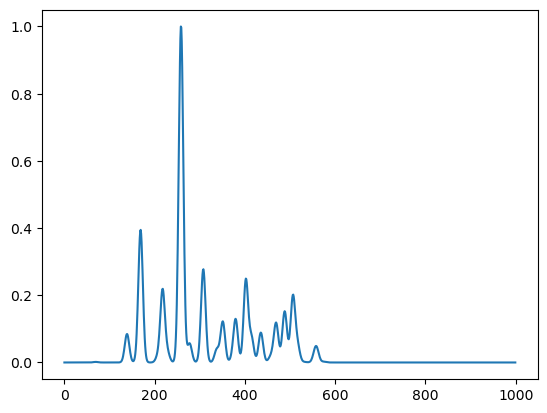

data_Th2Ni4P4
loop_
_atom_type_symbol
_atom_type_electronegativity
_atom_type_radius
_atom_type_ionic_radius
Th 1.3000 1.8000 1.0800
Ni 1.9100 1.3500 0.7400
P 2.1900 1.0000 0.5500
_symmetry_space_group_name_H-M P4/nmm
_cell_length_a 4.0833
_cell_length_b 4.0833
_cell_length_c 9.0587
_cell_angle_alpha 90.0000
_cell_angle_beta 90.0000
_cell_angle_gamma 90.0000
_symmetry_Int_Tables_number 129
_chemical_formula_structural Th(NiP)2
_chemical_formula_sum 'Th2 Ni4 P4'
_cell_volume 151.0415
_cell_formula_units_Z 2
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 'x, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Th Th0 2 0.0000 0.5000 0.7514 1.0000
Ni Ni1 2 0.0000 0.0000 0.0000 1.0000
Ni Ni2 2 0.0000 0.5000 0.3860 1.0000
P P3 2 0.0000 0.0000 0.5000 1.0000
P P4 2 0.0000 0.5000 0.1290 1.0000

data_O2Ni1O2Br20'Na 22.8 0.0.00.4 4884 W17 007 00.00.21 000.4278 136000
O 00

In [10]:
# Sample from dataset
for i, sample in enumerate(iter(dataset)):
    cif_tokens, xrd = sample
    plt.plot(xrd)
    plt.show()
    xrd = xrd.to(device=device)

    xrd_random = torch.rand_like(xrd).to(device=device)
    prompt = extract_prompt(cif_tokens, model.device, add_composition=False, add_spacegroup=False).unsqueeze(0)
    print(decode(cif_tokens.cpu().numpy()))
    print()
#     print(prompt)
    
#     model(prompt, cond_vec=xrd, start_indices_batch = [[0]])
#     model(prompt, cond_vec=xrd_random, start_indices_batch = [[0]])
    
    model.generate_and_print(prompt, max_new_tokens=1000, cond_vec=None, start_indices_batch = [[0]])
    model.generate_and_print(prompt, max_new_tokens=1000, cond_vec=xrd_random, start_indices_batch = [[0]])
    
    #model.generate_and_print(prompt, max_new_tokens=1000, cond_vec=xrd, start_indices_batch = [[0]])
    #print("\n\n\n")
    #model.generate_and_print(prompt, max_new_tokens=1000, cond_vec=xrd_random, start_indices_batch = [[0]])

#     out = model.generate(prompt, max_new_tokens=1000, cond_vec=xrd, start_indices_batch = [[0]])
    break

In [8]:
print(decode(out[0].cpu().numpy()))

data_Th2Ni4P4
_atom_type_symbol
_atom_type_symbol
_atom_type_electronegativity
_atom_type_radius
_atom_type_ionic_radius
Ti 060.80 2500 2.400 1.510 O 1.5.6000 1.00 00
S 3.1.764 3 000.880 00.0
C 0.600.80
Cl 0.12500 172 3.28 3640.00000
_symmetry_space_group_name_H-M P6_3/mmc
Nd 1580882
_cell_length_b 7.163
_cell_length_c 193.0
_cell_angle_alpha 9000.2300
_cell_angle_beta 11
_cell_angle_gamma 90.00.203875
_symmetry_Int_Tables_number 5
_chemical_formula_sum 'Mg3 Co36'
_cell_formula_units_Z  _symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
2 'x, '
loop_
loop_
loop_
loop_
_atom_site_type_symbol
_atom_site_symmetry_multiplicity
_atom_site_fract_y
_atom_site_occupancy
Te1.00.0.51 Sn125000000 1 48 0.50.18 0.00000500 0
Br2350 16 0 0.00.000 17 1 0000000 0.00.00000000.0
data_0.2 0.45000.000000
Zn 00000 Ir 1.0 1 U3695460 000
O3 0.587 0007 18 0 000090 0 Sn39 4 C3 0.0.2592 0 23 4367 0.7081.1.0
O1.0
O5004 1.0 0.25782 0.624254275 1.0 O43 0.791.0.0
O4 0.50.0
S490.0
O16616 00000.03380.1.50
Mo7938 O

In [1]:
import os
import sys
sys.path.append("./")
import yaml

import torch
from torch.utils.data import DataLoader

import numpy as np

from decifer import (
    DeciferConfig,
    Decifer, # TODO make this DeciferModel instead
    DeciferDataset,
    Tokenizer,
    load_model_from_checkpoint,
    extract_prompt
)


# Sample inputs
batch_size = 4
seq_len = 10
config = DeciferConfig()
device = 'cuda'
model = Decifer(config).to(device)

idx = torch.randint(0, config.vocab_size, (batch_size, seq_len), device=device)
targets = idx.clone()
cond_vec = torch.randn(batch_size, config.block_size, device=device)

start_indices_batch = [
    [2, 5],       # Start indices for the first sequence
    [3, 7],       # Start indices for the second sequence
    [1, 4, 6],    # Start indices for the third sequence
    [],           # No insertions for the fourth sequence
]

logits, loss = model(idx, cond_vec=cond_vec, targets=targets, start_indices_batch=start_indices_batch)


number of total parameters: 25.41M


In [2]:
logits.shape

torch.Size([4, 13, 372])

In [3]:
loss

tensor(5.0040, device='cuda:0', grad_fn=<NllLossBackward0>)